In [1]:
from argparser import argparser
from train import main

In [2]:
from torch import nn, optim
import time
import torch

# Load MNIST

In [3]:
from config import config_dataloader, load_config
args=argparser(args=["--config", "config/mninst_ach.json"])

In [4]:
conf = load_config(args)
train_data, test_data = config_dataloader(conf, **conf['training_params']['loader_params'])

loading config file: config/mninst_ach.json


In [5]:
dataiter = iter(train_data)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([256, 1, 28, 28])
torch.Size([256])


In [6]:
# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

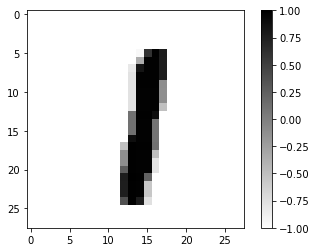

In [16]:
import matplotlib.pyplot as plt
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');
plt.colorbar()

## Regular model 

In [12]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [13]:
def train(model, epochs=20):
    criterion = nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
    for e in range(epochs):
        running_loss = 0
        for images, labels in train_data:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

            # Training pass
            optimizer.zero_grad()

            output = model(images)
            loss = criterion(output, labels)

            #This is where the model learns by backpropagating
            loss.backward()

            #And optimizes its weights here
            optimizer.step()

            running_loss += loss.item()
        else:
            print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_data)))

In [14]:
train(model, 20)

Epoch 0 - Training loss: 1.3668332068209952
Epoch 1 - Training loss: 0.43833617542652376
Epoch 2 - Training loss: 0.3520328814044912
Epoch 3 - Training loss: 0.3171407185970469
Epoch 4 - Training loss: 0.2945463395499169
Epoch 5 - Training loss: 0.27611399495855293
Epoch 6 - Training loss: 0.25899137372666214
Epoch 7 - Training loss: 0.2438512054529596
Epoch 8 - Training loss: 0.22863398505018112
Epoch 9 - Training loss: 0.21493032438323853
Epoch 10 - Training loss: 0.20323698041920965
Epoch 11 - Training loss: 0.19230362351270433
Epoch 12 - Training loss: 0.18154056848997766
Epoch 13 - Training loss: 0.1725141558558383
Epoch 14 - Training loss: 0.16351451483812737
Epoch 15 - Training loss: 0.1563763066809228
Epoch 16 - Training loss: 0.14881025330817446
Epoch 17 - Training loss: 0.14148403972070267
Epoch 18 - Training loss: 0.1350017433153822
Epoch 19 - Training loss: 0.1298179698909851


In [15]:
correct_count, all_count = 0, 0
for images,labels in test_data:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        # Turn off gradients to speed up this part
        with torch.no_grad():
            logps = model(img)

        # Output of the network are log-probabilities, need to take exponential for probabilities
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9607


Probability distribution


In [56]:
train(model, 20)

Epoch 0 - Training loss: 0.631500760438854
Epoch 1 - Training loss: 0.27961867349520164
Epoch 2 - Training loss: 0.21898612745408055
Epoch 3 - Training loss: 0.17823455043867834
Epoch 4 - Training loss: 0.1494252105702215
Epoch 5 - Training loss: 0.12916536347519583
Epoch 6 - Training loss: 0.11253338571447236
Epoch 7 - Training loss: 0.0996173121946564
Epoch 8 - Training loss: 0.09001072361441786
Epoch 9 - Training loss: 0.08020062065784579
Epoch 10 - Training loss: 0.07380738645257838
Epoch 11 - Training loss: 0.06826841225599381
Epoch 12 - Training loss: 0.06326458537414956
Epoch 13 - Training loss: 0.05818666185466831
Epoch 14 - Training loss: 0.054499999095779114
Epoch 15 - Training loss: 0.050757360577122615
Epoch 16 - Training loss: 0.047360242749286345
Epoch 17 - Training loss: 0.04448810637668411
Epoch 18 - Training loss: 0.04111967496012947
Epoch 19 - Training loss: 0.03918470161855777


In [11]:
# Take model, take sample

In [3]:
main(args)

loading config file: config/mninst_ach.json
./mnist_crown/regular_dense.pth
Command line: /opt/miniconda3/envs/scvi/lib/python3.7/site-packages/ipykernel_launcher.py -f /Users/achille/Library/Jupyter/runtime/kernel-b30aaf25-e62a-4088-aa6b-b3d608f7a8b2.json
training configurations: {'method': 'robust', 'epochs': 100, 'lr': 0.0005, 'lr_decay_step': 10, 'lr_decay_factor': 0.5, 'lr_decay_milestones': [], 'weight_decay': 0.0, 'optimizer': 'adam', 'starting_epsilon': 0.0, 'epsilon': 0.3, 'schedule_length': 61, 'schedule_type': 'linear', 'norm': 'inf', 'verbose': False, 'multi_gpu': False, 'loader_params': {'batch_size': 256, 'shuffle_train': True, 'test_batch_size': 256}, 'method_params': {'batch_size': 128, 'shuffle_train': True, 'runnerup_only': False, 'activity_reg': 0.0, 'l1_reg': 0.0, 'final-beta': 0.0, 'final-kappa': 0.5, 'convex-proj': 50, 'bound_opts': {'same-slope': False, 'zero-lb': False, 'one-lb': False}, 'batch_multiplier': 1, 'bounded_input': True, 'bound_type': 'crown-interval

[ 2: 150]: eps 0.008191  Time 0.034 (0.037)  Total Loss 0.2880 (0.3082)  L1 Loss 0.0000 (0.0000)  CE 0.2127 (0.2389)  RCE 0.2880 (0.3082)  Err 0.0391 (0.0684)  Rob Err 0.0664 (0.0880)  Uns 10.9 (9.6)  Dead 29.0 (28.9)  Alive 152.1 (153.5)  Tightness 10.92188 (9.58004)  Bias -0.56856 (-0.46729)  Diff 37.66497 (30.62593)  R 40.722  beta 0.973 (0.973)  kappa 1.000 (1.000)  
[ 2: 200]: eps 0.009255  Time 0.034 (0.036)  Total Loss 0.2338 (0.3115)  L1 Loss 0.0000 (0.0000)  CE 0.1501 (0.2364)  RCE 0.2338 (0.3115)  Err 0.0430 (0.0677)  Rob Err 0.0664 (0.0890)  Uns 11.9 (10.0)  Dead 30.3 (29.1)  Alive 149.8 (152.9)  Tightness 11.92188 (9.99201)  Bias -0.95675 (-0.57513)  Diff 41.31619 (32.82769)  R 34.971  beta 0.969 (0.969)  kappa 1.000 (1.000)  
[FINAL RESULT epoch: 2 eps:0.0100]: Time 0.017 (0.036)  Total Loss 0.3730 (0.3104)  L1 Loss 0.0000 (0.0000)  CE 0.2866 (0.2321)  RCE 0.3730 (0.3104)  Uns 12.021 (10.243)  Dead 30.1 (29.3)  Alive 149.9 (152.4)  Tight 12.02083 (10.24343)  Bias -0.83066 

[ 5:  50]: eps 0.021064  Time 0.031 (0.039)  Total Loss 0.3256 (0.3682)  L1 Loss 0.0000 (0.0000)  CE 0.1323 (0.1661)  RCE 0.3256 (0.3682)  Err 0.0508 (0.0491)  Rob Err 0.0977 (0.1060)  Uns 15.0 (14.8)  Dead 35.3 (34.7)  Alive 141.6 (142.5)  Tightness 15.01172 (14.78784)  Bias -1.66080 (-1.67415)  Diff 72.23446 (71.67559)  R 31.482  beta 0.930 (0.930)  kappa 1.000 (1.000)  
[ 5: 100]: eps 0.022128  Time 0.033 (0.036)  Total Loss 0.3313 (0.3770)  L1 Loss 0.0000 (0.0000)  CE 0.1338 (0.1682)  RCE 0.3313 (0.3770)  Err 0.0430 (0.0489)  Rob Err 0.0898 (0.1093)  Uns 15.3 (14.9)  Dead 35.6 (35.0)  Alive 141.2 (142.1)  Tightness 15.29297 (14.86564)  Bias -1.69881 (-1.66890)  Diff 73.23051 (72.21384)  R 32.309  beta 0.926 (0.926)  kappa 1.000 (1.000)  
[ 5: 150]: eps 0.023191  Time 0.032 (0.036)  Total Loss 0.3586 (0.3765)  L1 Loss 0.0000 (0.0000)  CE 0.1347 (0.1646)  RCE 0.3586 (0.3765)  Err 0.0391 (0.0480)  Rob Err 0.1211 (0.1091)  Uns 15.6 (15.1)  Dead 36.2 (35.3)  Alive 140.2 (141.6)  Tightne

[ 8:   0]: eps 0.035000  Time 0.096 (0.096)  Total Loss 0.4410 (0.4410)  L1 Loss 0.0000 (0.0000)  CE 0.1189 (0.1189)  RCE 0.4410 (0.4410)  Err 0.0352 (0.0352)  Rob Err 0.1445 (0.1445)  Uns 18.9 (18.9)  Dead 41.3 (41.3)  Alive 131.8 (131.8)  Tightness 18.85156 (18.85156)  Bias -2.38988 (-2.38988)  Diff 69.64336 (69.64336)  R 29.933  beta 0.883 (0.883)  kappa 1.000 (1.000)  
[ 8:  50]: eps 0.036064  Time 0.046 (0.040)  Total Loss 0.4402 (0.4639)  L1 Loss 0.0000 (0.0000)  CE 0.1288 (0.1384)  RCE 0.4402 (0.4639)  Err 0.0430 (0.0417)  Rob Err 0.1367 (0.1366)  Uns 19.8 (19.4)  Dead 41.8 (41.5)  Alive 130.4 (131.1)  Tightness 19.83594 (19.44248)  Bias -2.67944 (-2.69902)  Diff 67.39041 (68.42806)  R 33.158  beta 0.880 (0.880)  kappa 1.000 (1.000)  
[ 8: 100]: eps 0.037128  Time 0.035 (0.037)  Total Loss 0.5224 (0.4817)  L1 Loss 0.0000 (0.0000)  CE 0.1843 (0.1437)  RCE 0.5224 (0.4817)  Err 0.0547 (0.0432)  Rob Err 0.1445 (0.1420)  Uns 19.6 (19.5)  Dead 41.4 (41.6)  Alive 131.0 (130.8)  Tightne

[FINAL RESULT epoch:10 eps:0.0500]: Time 0.003 (0.016)  Total Loss 0.2339 (0.5716)  L1 Loss 0.0000 (0.0000)  CE 0.0266 (0.1440)  RCE 0.2339 (0.5716)  Uns 16.562 (21.686)  Dead 47.4 (47.0)  Alive 128.0 (123.3)  Tight 16.56250 (21.68580)  Bias -1.45928 (-2.74819)  Diff 48.10524 (48.30892)  Err 0.0000 (0.0435)  Rob Err 0.0625 (0.1713)  R 25.952  beta 0.833 (0.833)  kappa 1.000 (1.000)  

layer 1 norm 21.17996597290039
layer 3 norm 9.127237319946289
layer 5 norm 7.451214790344238
saving to ./mnist_crown/regular_dense.pth
Epoch 11, learning rate [0.0005], epsilon 0.05 - 0.055
[11:   0]: eps 0.050000  Time 0.118 (0.118)  Total Loss 0.6646 (0.6646)  L1 Loss 0.0000 (0.0000)  CE 0.1943 (0.1943)  RCE 0.6646 (0.6646)  Err 0.0625 (0.0625)  Rob Err 0.1836 (0.1836)  Uns 22.3 (22.3)  Dead 47.0 (47.0)  Alive 122.7 (122.7)  Tightness 22.32031 (22.32031)  Bias -2.57277 (-2.57277)  Diff 47.87854 (47.87854)  R 29.759  beta 0.833 (0.833)  kappa 1.000 (1.000)  
[11:  50]: eps 0.051064  Time 0.032 (0.040)  T

[FINAL RESULT epoch:13 eps:0.0650]: Time 0.017 (0.036)  Total Loss 0.8064 (0.6971)  L1 Loss 0.0000 (0.0000)  CE 0.1593 (0.1670)  RCE 0.8064 (0.6971)  Uns 24.573 (24.201)  Dead 49.6 (48.6)  Alive 117.8 (119.2)  Tight 24.57292 (24.20050)  Bias -2.22339 (-2.30441)  Diff 32.56457 (35.14496)  Err 0.0312 (0.0490)  Rob Err 0.2188 (0.2006)  R 23.366  beta 0.783 (0.783)  kappa 1.000 (1.000)  

layer 1 norm 19.391611099243164
layer 3 norm 9.074681282043457
layer 5 norm 7.449430465698242
Epoch time: 8.6502, Total time: 114.4377
Evaluating...
[FINAL RESULT epoch:13 eps:0.0650]: Time 0.003 (0.017)  Total Loss 0.2758 (0.6885)  L1 Loss 0.0000 (0.0000)  CE 0.0340 (0.1592)  RCE 0.2758 (0.6885)  Uns 20.062 (23.981)  Dead 51.2 (49.5)  Alive 120.7 (118.5)  Tight 20.06250 (23.98080)  Bias -1.02431 (-1.97688)  Diff 31.70740 (32.38111)  Err 0.0000 (0.0452)  Rob Err 0.1875 (0.2026)  R 24.026  beta 0.783 (0.783)  kappa 1.000 (1.000)  

layer 1 norm 19.391611099243164
layer 3 norm 9.074681282043457
layer 5 norm

[16: 150]: eps 0.078191  Time 0.041 (0.039)  Total Loss 0.7256 (0.8261)  L1 Loss 0.0000 (0.0000)  CE 0.1372 (0.1874)  RCE 0.7256 (0.8261)  Err 0.0273 (0.0548)  Rob Err 0.1953 (0.2373)  Uns 25.8 (25.8)  Dead 50.3 (49.9)  Alive 115.8 (116.4)  Tightness 25.84766 (25.76485)  Bias -1.41456 (-1.27407)  Diff 23.14619 (24.28529)  R 24.055  beta 0.739 (0.739)  kappa 1.000 (1.000)  
[16: 200]: eps 0.079255  Time 0.044 (0.039)  Total Loss 0.8175 (0.8327)  L1 Loss 0.0000 (0.0000)  CE 0.1783 (0.1904)  RCE 0.8175 (0.8327)  Err 0.0508 (0.0552)  Rob Err 0.2578 (0.2389)  Uns 26.2 (25.8)  Dead 49.8 (49.9)  Alive 116.0 (116.3)  Tightness 26.20312 (25.79818)  Bias -0.34172 (-1.19878)  Diff 22.09550 (23.93915)  R 24.961  beta 0.736 (0.736)  kappa 1.000 (1.000)  
[FINAL RESULT epoch:16 eps:0.0800]: Time 0.019 (0.039)  Total Loss 0.8469 (0.8344)  L1 Loss 0.0000 (0.0000)  CE 0.2719 (0.1916)  RCE 0.8469 (0.8344)  Uns 27.115 (25.817)  Dead 49.6 (49.9)  Alive 115.2 (116.3)  Tight 27.11458 (25.81687)  Bias -1.057

[19:  50]: eps 0.091064  Time 0.033 (0.040)  Total Loss 0.9580 (0.9621)  L1 Loss 0.0000 (0.0000)  CE 0.2263 (0.2236)  RCE 0.9580 (0.9621)  Err 0.0625 (0.0606)  Rob Err 0.2500 (0.2747)  Uns 25.9 (26.0)  Dead 50.1 (50.3)  Alive 115.9 (115.6)  Tightness 25.94922 (26.03378)  Bias -0.85618 (-0.69835)  Diff 16.53714 (17.05492)  R 24.386  beta 0.696 (0.696)  kappa 1.000 (1.000)  
[19: 100]: eps 0.092128  Time 0.033 (0.037)  Total Loss 0.8395 (0.9626)  L1 Loss 0.0000 (0.0000)  CE 0.1712 (0.2221)  RCE 0.8395 (0.9626)  Err 0.0469 (0.0611)  Rob Err 0.2578 (0.2740)  Uns 26.1 (26.0)  Dead 49.8 (50.3)  Alive 116.1 (115.7)  Tightness 26.14844 (25.96867)  Bias 0.90161 (-0.67986)  Diff 15.59745 (16.77023)  R 24.598  beta 0.693 (0.693)  kappa 1.000 (1.000)  
[19: 150]: eps 0.093191  Time 0.034 (0.036)  Total Loss 0.9044 (0.9698)  L1 Loss 0.0000 (0.0000)  CE 0.1861 (0.2217)  RCE 0.9044 (0.9698)  Err 0.0508 (0.0615)  Rob Err 0.2617 (0.2766)  Uns 25.9 (26.0)  Dead 50.6 (50.3)  Alive 115.5 (115.8)  Tightnes

[22:   0]: eps 0.105000  Time 0.110 (0.110)  Total Loss 1.0655 (1.0655)  L1 Loss 0.0000 (0.0000)  CE 0.2592 (0.2592)  RCE 1.0655 (1.0655)  Err 0.0664 (0.0664)  Rob Err 0.3086 (0.3086)  Uns 26.3 (26.3)  Dead 50.1 (50.1)  Alive 115.6 (115.6)  Tightness 26.30469 (26.30469)  Bias -0.60241 (-0.60241)  Diff 11.68780 (11.68780)  R 25.138  beta 0.650 (0.650)  kappa 1.000 (1.000)  
[22:  50]: eps 0.106064  Time 0.055 (0.042)  Total Loss 1.1666 (1.0993)  L1 Loss 0.0000 (0.0000)  CE 0.2614 (0.2596)  RCE 1.1666 (1.0993)  Err 0.0742 (0.0718)  Rob Err 0.3555 (0.3155)  Uns 25.7 (25.8)  Dead 50.2 (50.0)  Alive 116.2 (116.2)  Tightness 25.67188 (25.80599)  Bias -0.80767 (-0.96806)  Diff 11.56540 (11.58317)  R 25.397  beta 0.646 (0.646)  kappa 1.000 (1.000)  
[22: 100]: eps 0.107128  Time 0.035 (0.040)  Total Loss 0.9888 (1.0928)  L1 Loss 0.0000 (0.0000)  CE 0.2153 (0.2592)  RCE 0.9888 (1.0928)  Err 0.0547 (0.0704)  Rob Err 0.2617 (0.3117)  Uns 25.4 (25.9)  Dead 50.2 (49.9)  Alive 116.4 (116.2)  Tightne

[FINAL RESULT epoch:24 eps:0.1200]: Time 0.003 (0.021)  Total Loss 0.6875 (1.1344)  L1 Loss 0.0000 (0.0000)  CE 0.0912 (0.2862)  RCE 0.6875 (1.1344)  Uns 22.938 (25.817)  Dead 52.5 (50.2)  Alive 116.5 (116.0)  Tight 22.93750 (25.81710)  Bias 0.19598 (-1.69032)  Diff 7.00226 (7.32839)  Err 0.0000 (0.0771)  Rob Err 0.2500 (0.3273)  R 22.245  beta 0.600 (0.600)  kappa 1.000 (1.000)  

layer 1 norm 18.60214614868164
layer 3 norm 10.530204772949219
layer 5 norm 7.631095886230469
saving to ./mnist_crown/regular_dense.pth
Epoch 25, learning rate [0.0005], epsilon 0.12 - 0.125
[25:   0]: eps 0.120000  Time 0.111 (0.111)  Total Loss 1.1861 (1.1861)  L1 Loss 0.0000 (0.0000)  CE 0.2581 (0.2581)  RCE 1.1861 (1.1861)  Err 0.0664 (0.0664)  Rob Err 0.3203 (0.3203)  Uns 26.5 (26.5)  Dead 49.5 (49.5)  Alive 116.0 (116.0)  Tightness 26.48047 (26.48047)  Bias -3.02226 (-3.02226)  Diff 7.65648 (7.65648)  R 23.144  beta 0.600 (0.600)  kappa 1.000 (1.000)  
[25:  50]: eps 0.121064  Time 0.039 (0.049)  Total

[FINAL RESULT epoch:27 eps:0.1350]: Time 0.016 (0.036)  Total Loss 1.3783 (1.2438)  L1 Loss 0.0000 (0.0000)  CE 0.3324 (0.3480)  RCE 1.3783 (1.2438)  Uns 27.927 (27.012)  Dead 48.3 (49.9)  Alive 115.8 (115.1)  Tight 27.92708 (27.01175)  Bias -2.66838 (-2.88450)  Diff 4.37002 (4.78770)  Err 0.0833 (0.0935)  Rob Err 0.4271 (0.3540)  R 22.685  beta 0.550 (0.550)  kappa 1.000 (1.000)  

layer 1 norm 16.452974319458008
layer 3 norm 10.428391456604004
layer 5 norm 7.711224555969238
Epoch time: 8.6795, Total time: 243.3749
Evaluating...
[FINAL RESULT epoch:27 eps:0.1350]: Time 0.003 (0.017)  Total Loss 0.8988 (1.2100)  L1 Loss 0.0000 (0.0000)  CE 0.1515 (0.3412)  RCE 0.8988 (1.2100)  Uns 23.000 (26.676)  Dead 53.1 (50.4)  Alive 115.9 (114.9)  Tight 23.00000 (26.67560)  Bias -0.49169 (-2.95861)  Diff 4.14321 (4.33975)  Err 0.0000 (0.0919)  Rob Err 0.2500 (0.3491)  R 20.344  beta 0.550 (0.550)  kappa 1.000 (1.000)  

layer 1 norm 16.452974319458008
layer 3 norm 10.428391456604004
layer 5 norm 7

[30: 150]: eps 0.148191  Time 0.044 (0.036)  Total Loss 1.1565 (1.2940)  L1 Loss 0.0000 (0.0000)  CE 0.3693 (0.4022)  RCE 1.1565 (1.2940)  Err 0.1016 (0.1102)  Rob Err 0.3359 (0.3670)  Uns 29.0 (28.4)  Dead 49.6 (49.8)  Alive 113.4 (113.8)  Tightness 28.98047 (28.44456)  Bias -3.97932 (-3.85474)  Diff 2.27056 (2.73326)  R 21.610  beta 0.506 (0.506)  kappa 1.000 (1.000)  
[30: 200]: eps 0.149255  Time 0.032 (0.036)  Total Loss 1.3386 (1.2986)  L1 Loss 0.0000 (0.0000)  CE 0.4382 (0.4068)  RCE 1.3386 (1.2986)  Err 0.1016 (0.1112)  Rob Err 0.3750 (0.3681)  Uns 28.4 (28.5)  Dead 49.8 (49.8)  Alive 113.8 (113.7)  Tightness 28.42188 (28.49850)  Bias -2.97995 (-3.90585)  Diff 2.44299 (2.65849)  R 21.281  beta 0.502 (0.502)  kappa 1.000 (1.000)  
[FINAL RESULT epoch:30 eps:0.1500]: Time 0.017 (0.035)  Total Loss 1.3204 (1.3003)  L1 Loss 0.0000 (0.0000)  CE 0.4274 (0.4088)  RCE 1.3204 (1.3003)  Uns 27.771 (28.524)  Dead 50.9 (49.8)  Alive 113.3 (113.7)  Tight 27.77083 (28.52358)  Bias -3.06276 (

[33:  50]: eps 0.161064  Time 0.035 (0.047)  Total Loss 1.4106 (1.3559)  L1 Loss 0.0000 (0.0000)  CE 0.4625 (0.4688)  RCE 1.4106 (1.3559)  Err 0.0977 (0.1285)  Rob Err 0.4297 (0.3833)  Uns 30.2 (29.9)  Dead 49.5 (49.7)  Alive 112.2 (112.4)  Tightness 30.21484 (29.89844)  Bias -5.55657 (-4.46115)  Diff 1.03416 (1.39777)  R 23.708  beta 0.463 (0.463)  kappa 1.000 (1.000)  
[33: 100]: eps 0.162128  Time 0.037 (0.042)  Total Loss 1.2782 (1.3524)  L1 Loss 0.0000 (0.0000)  CE 0.4336 (0.4713)  RCE 1.2782 (1.3524)  Err 0.1094 (0.1286)  Rob Err 0.3594 (0.3815)  Uns 30.7 (29.8)  Dead 48.8 (49.7)  Alive 112.5 (112.5)  Tightness 30.66797 (29.84054)  Bias -3.89610 (-4.46528)  Diff 1.22135 (1.33788)  R 22.825  beta 0.460 (0.460)  kappa 1.000 (1.000)  
[33: 150]: eps 0.163191  Time 0.036 (0.042)  Total Loss 1.2940 (1.3453)  L1 Loss 0.0000 (0.0000)  CE 0.4789 (0.4695)  RCE 1.2940 (1.3453)  Err 0.1289 (0.1280)  Rob Err 0.3281 (0.3792)  Uns 30.3 (29.8)  Dead 49.2 (49.7)  Alive 112.4 (112.5)  Tightness 3

[36:   0]: eps 0.175000  Time 0.093 (0.093)  Total Loss 1.3219 (1.3219)  L1 Loss 0.0000 (0.0000)  CE 0.5013 (0.5013)  RCE 1.3219 (1.3219)  Err 0.1133 (0.1133)  Rob Err 0.3828 (0.3828)  Uns 30.6 (30.6)  Dead 49.9 (49.9)  Alive 111.4 (111.4)  Tightness 30.64062 (30.64062)  Bias -4.80244 (-4.80244)  Diff 0.29515 (0.29515)  R 23.066  beta 0.417 (0.417)  kappa 1.000 (1.000)  
[36:  50]: eps 0.176064  Time 0.033 (0.040)  Total Loss 1.3767 (1.3472)  L1 Loss 0.0000 (0.0000)  CE 0.5103 (0.5051)  RCE 1.3767 (1.3472)  Err 0.1289 (0.1340)  Rob Err 0.3867 (0.3796)  Uns 30.9 (30.4)  Dead 49.5 (49.8)  Alive 111.7 (111.8)  Tightness 30.85156 (30.43137)  Bias -5.31030 (-4.01451)  Diff 0.42239 (0.38329)  R 24.878  beta 0.413 (0.413)  kappa 1.000 (1.000)  
[36: 100]: eps 0.177128  Time 0.040 (0.037)  Total Loss 1.3872 (1.3502)  L1 Loss 0.0000 (0.0000)  CE 0.5460 (0.5078)  RCE 1.3872 (1.3502)  Err 0.1523 (0.1360)  Rob Err 0.3711 (0.3814)  Uns 31.6 (30.4)  Dead 48.5 (49.8)  Alive 111.9 (111.8)  Tightness 3

KeyboardInterrupt: 